In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dftest=pd.read_parquet('../proyecto_ML/test.parquet')

In [3]:
dftest.head()

,id,url,region,region_url,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7037609789,https://annarbor.craigslist.org/apa/d/wixom-ho...,ann arbor,https://annarbor.craigslist.org,manufactured,1344,3,2.0,0,0,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00M0M_iNczP1nzIL...,"OPEN HOUSE TODAY! APPLY THIS WEEK, PUT A HOLDI...",42.5333,-83.5763,mi
1,7032406876,https://vermont.craigslist.org/apa/d/randolph-...,vermont,https://vermont.craigslist.org,apartment,1050,2,1.0,0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00L0L_ecirmYBIzL...,"Think of it, you'll be first to get your mail....",43.9393,-72.5538,vt
2,7037022682,https://annarbor.craigslist.org/apa/d/ann-arbo...,ann arbor,https://annarbor.craigslist.org,apartment,1150,2,2.0,1,1,...,1,0,0,w/d in unit,carport,https://images.craigslist.org/00e0e_dPln2xjo9g...,One of Ann Arbor's most luxurious apartment co...,42.2492,-83.7712,mi
3,7048681802,https://fortcollins.craigslist.org/apa/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,apartment,1280,2,2.5,1,1,...,0,0,0,w/d in unit,attached garage,https://images.craigslist.org/00L0L_jlektT5cSd...,"Specials! Move in before January 16th, 2020 an...",40.5501,-105.0350,co
4,7043597870,https://charlottesville.craigslist.org/apa/d/c...,charlottesville,https://charlottesville.craigslist.org,apartment,783,2,1.0,1,1,...,0,0,0,laundry on site,None,https://images.craigslist.org/00D0D_cXa4KbZ6ox...,Barracks West Apartments & Townhomes in Charlo...,38.0936,-78.5611,va


In [4]:
len(dftest)

38498

In [5]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38498 entries, 0 to 38497
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38498 non-null  int64  
 1   url                      38498 non-null  object 
 2   region                   38498 non-null  object 
 3   region_url               38498 non-null  object 
 4   type                     38498 non-null  object 
 5   sqfeet                   38498 non-null  int64  
 6   beds                     38498 non-null  int64  
 7   baths                    38498 non-null  float64
 8   cats_allowed             38498 non-null  int64  
 9   dogs_allowed             38498 non-null  int64  
 10  smoking_allowed          38498 non-null  int64  
 11  wheelchair_access        38498 non-null  int64  
 12  electric_vehicle_charge  38498 non-null  int64  
 13  comes_furnished          38498 non-null  int64  
 14  laundry_options       

In [6]:
#Eliminar comlumnas que no son relevantes para el estudio
dftest=dftest.drop(['id','url','region_url','image_url','description'], axis=1)

In [7]:
dftest.isna().sum()

region                         0
type                           0
sqfeet                         0
beds                           0
baths                          0
cats_allowed                   0
dogs_allowed                   0
smoking_allowed                0
wheelchair_access              0
electric_vehicle_charge        0
comes_furnished                0
laundry_options             7855
parking_options            14005
lat                          196
long                         196
state                          0
dtype: int64

In [8]:
dftest_na=dftest[dftest['laundry_options'].isna()==True]
dftest_na

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
6,myrtle beach,apartment,1034,2,2.0,1,1,1,0,0,0,None,None,33.8185,-78.6963,sc
8,mansfield,house,1,2,1.5,0,0,1,0,0,0,None,None,40.8784,-82.6549,oh
10,charlotte,apartment,915,2,1.5,1,1,0,0,0,0,None,off-street parking,35.2162,-80.7934,nc
12,decatur,apartment,640,1,1.0,1,1,1,0,0,0,None,off-street parking,39.8941,-88.9311,il
15,lexington,apartment,801,2,2.0,1,1,1,0,0,0,None,None,37.9889,-84.4977,ky
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38451,daytona beach,apartment,600,1,1.0,1,1,1,0,0,0,None,None,29.2008,-81.0710,fl
38461,las vegas,apartment,1120,2,2.0,0,0,1,0,0,0,None,None,36.1591,-115.2770,nv
38464,el paso,apartment,640,1,1.0,1,1,1,0,0,0,None,None,31.9264,-106.4070,tx
38467,st cloud,apartment,960,2,2.0,1,1,1,0,0,0,None,None,45.3027,-93.8045,mn


In [9]:
dftest_na.describe()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7855.000000,7824.000000,7824.000000
mean,1019.224698,1.939020,1.495926,0.420115,0.421897,0.933927,0.020369,0.003947,0.020624,36.478079,-89.935658
std,546.632507,0.921947,0.617922,0.493608,0.493894,0.248425,0.141269,0.062701,0.142130,5.096233,15.684591
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.428200,-158.210000
25%,761.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,32.847300,-96.858300
50%,950.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,36.220000,-85.624100
75%,1182.000000,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,40.310700,-80.632600
max,34135.000000,6.000000,7.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.878100,94.124800


In [10]:
dftest_na2=dftest[dftest['parking_options'].isna()==True]
dftest_na2

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
4,charlottesville,apartment,783,2,1.0,1,1,1,0,0,0,laundry on site,None,38.0936,-78.5611,va
6,myrtle beach,apartment,1034,2,2.0,1,1,1,0,0,0,None,None,33.8185,-78.6963,sc
8,mansfield,house,1,2,1.5,0,0,1,0,0,0,None,None,40.8784,-82.6549,oh
15,lexington,apartment,801,2,2.0,1,1,1,0,0,0,None,None,37.9889,-84.4977,ky
20,college station,house,2300,4,2.5,1,1,1,0,0,0,w/d hookups,None,30.6765,-96.2950,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38481,corpus christi,apartment,1035,2,2.0,1,1,1,0,0,0,w/d hookups,None,27.6889,-97.3627,tx
38485,tampa bay area,apartment,1438,4,3.0,1,1,1,0,0,0,w/d hookups,None,28.4968,-82.5985,fl
38489,cleveland,apartment,970,2,1.5,1,1,1,0,0,0,laundry in bldg,None,41.5012,-81.4897,oh
38490,harrisburg,apartment,1023,2,2.0,1,1,0,0,0,0,w/d in unit,None,40.2616,-76.9185,pa


In [11]:
dftest_na2.describe()

,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,14005.000000,14005.000000,14005.000000,14005.000000,14005.000000,14005.00000,14005.000000,14005.000000,14005.000000,13924.000000,13924.000000
mean,977.153517,1.857908,1.489825,0.640628,0.630775,0.87990,0.046840,0.005498,0.028204,36.056941,-90.362102
std,444.636185,0.868587,0.601002,0.479833,0.482612,0.32509,0.211304,0.073947,0.165562,5.165085,15.534818
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,19.428200,-158.210000
25%,750.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,32.297500,-97.347500
50%,940.000000,2.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,35.708300,-86.205300
75%,1132.000000,2.000000,2.000000,1.000000,1.000000,1.00000,0.000000,0.000000,0.000000,39.927100,-80.804100
max,34135.000000,6.000000,7.500000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,64.878100,94.124800


In [12]:
dftest.laundry_options.value_counts()

w/d in unit           13156
w/d hookups            7627
laundry on site        5924
laundry in bldg        3590
no laundry on site      346
Name: laundry_options, dtype: int64

In [13]:
dftest.parking_options.value_counts()

off-street parking    12890
attached garage        4163
carport                3907
detached garage        1626
street parking         1581
no parking              306
valet parking            20
Name: parking_options, dtype: int64

<AxesSubplot: xlabel='long', ylabel='lat'>

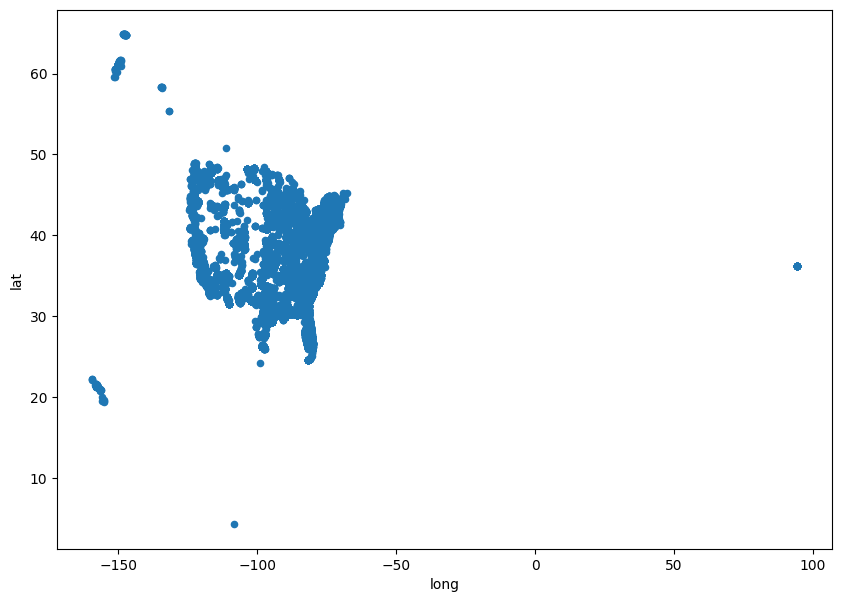

In [14]:
dftest.plot(kind='scatter', x='long', y='lat', figsize=(10,7))

In [15]:
dftest.corr()

C:\Users\Asus\AppData\Local\Temp\ipykernel_11960\2352912273.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dftest.corr()


,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
sqfeet,1.000000,0.065701,0.317127,-0.055366,-0.031395,-0.024935,-0.012392,0.004852,0.002039,0.008386,0.019106
beds,0.065701,1.000000,0.613230,-0.020588,-0.014766,0.001944,-0.008532,-0.002996,-0.000578,0.009798,0.005749
baths,0.317127,0.613230,1.000000,-0.022616,0.007578,-0.014843,0.012069,0.004583,0.029731,-0.063886,-0.005517
cats_allowed,-0.055366,-0.020588,-0.022616,1.000000,0.886800,0.018572,0.123087,0.050117,-0.053430,-0.012750,0.034187
dogs_allowed,-0.031395,-0.014766,0.007578,0.886800,1.000000,0.014378,0.130026,0.050109,-0.032931,-0.056605,0.016656
smoking_allowed,-0.024935,0.001944,-0.014843,0.018572,0.014378,1.000000,-0.223166,-0.094171,-0.156620,-0.177507,0.155616
wheelchair_access,-0.012392,-0.008532,0.012069,0.123087,0.130026,-0.223166,1.000000,0.197551,0.198187,0.004990,-0.023264
electric_vehicle_charge,0.004852,-0.002996,0.004583,0.050117,0.050109,-0.094171,0.197551,1.000000,0.073366,0.028333,-0.055013
comes_furnished,0.002039,-0.000578,0.029731,-0.053430,-0.032931,-0.156620,0.198187,0.073366,1.000000,0.005712,-0.027096
lat,0.008386,0.009798,-0.063886,-0.012750,-0.056605,-0.177507,0.004990,0.028333,0.005712,1.000000,-0.121483


In [16]:
#Codificación de las sisguientes variables categóricas region,type, laundry_options, parking_options
#Por label_encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
dftest['region'] = label_encoder.fit_transform(dftest['region'])
dftest['type'] = label_encoder.fit_transform(dftest['type'])
dftest['laundry_options'] = label_encoder.fit_transform(dftest['laundry_options'])
dftest['parking_options'] = label_encoder.fit_transform(dftest['parking_options'])
dftest['state'] = label_encoder.fit_transform(dftest['state'])
dftest

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,42.5333,-83.5763,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,43.9393,-72.5538,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,42.2492,-83.7712,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,40.5501,-105.0350,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,38.0936,-78.5611,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,30.6197,-87.8895,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,31.8045,-105.9660,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,27.8971,-82.3387,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,35.0052,-114.5690,3


In [17]:
X=pd.get_dummies(dftest)
X

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,lat,long,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,42.5333,-83.5763,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,43.9393,-72.5538,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,42.2492,-83.7712,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,40.5501,-105.0350,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,38.0936,-78.5611,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,30.6197,-87.8895,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,31.8045,-105.9660,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,27.8971,-82.3387,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,35.0052,-114.5690,3


In [18]:
X=X.drop(['lat','long'], axis=1)
X

,region,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,9,8,1344,3,2.0,0,0,1,0,0,0,4,4,22
1,370,0,1050,2,1.0,0,0,1,0,0,0,3,4,46
2,9,0,1150,2,2.0,1,1,1,1,0,0,4,1,22
3,112,0,1280,2,2.5,1,1,0,0,0,0,4,0,5
4,53,0,783,2,1.0,1,1,1,0,0,0,1,7,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38493,217,0,1180,2,2.0,1,1,0,1,0,0,4,2,1
38494,96,0,1138,3,2.0,1,1,1,0,0,0,3,4,43
38495,350,0,743,1,1.0,1,1,1,0,0,0,4,4,9
38496,219,5,1276,3,2.0,0,0,0,0,0,0,3,0,3


In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)

In [20]:
kmeans.fit(X)

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [21]:
etiquetas= kmeans.labels_
centros= kmeans.cluster_centers_

In [22]:
etiquetas

array([0, 1, 1, ..., 1, 0, 1])

In [23]:
dfp=pd.DataFrame(etiquetas)
dfp.rename(columns = {0:'pred'}, inplace = True)
dfp.pred.value_counts()

1    32344
0     6153
2        1
Name: pred, dtype: int64

In [24]:
dfp.to_csv('JcEC13(NS).csv',index=False)